# Fundamental of Data analysis **PROJECT**
by Andreia Santos

DATE: December, 2nd 2023
***

### **Reset workspace and libraries upload**
Attention!! This command requires caution as it permanently erases all objects and imported modules, offering no recovery option. This command is commonly employed to initiate a clean workspace, minimizing conflicts or unexpected errors resulting from prior definitions.

In [1]:
%reset -f

### __Import python libraries__

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
import os

***



## __Part 1 - Iris Dataset__

The iris dataset includes information about 150 flowers across different iris species: Setosa, Versicolor, and Virginica. Each class is equally represented, reaching a total of 50 flowers on each of the three classes. 

Despite the classification of each individual flower and additional four  numerical descriptores are described , namely: 
        <li>  sepal length (ranging from 4.3 to 7.9 mm)</li> 
        <li> sepal width (ranging from 2.0 to 4.4 mm)</li>
        <li> petal length (ranging from 1.0 to 6.9 mm)</li> 
        <li> petal width (ranging from 0.1 to 2.5 mm)</li> 
 
These four variables correspond to measurements that are continuous/numerical/quantitative values and characterize the flower's physical dimensions and are typically used for predicting  the flower class. 
 
Oppositely, the already  mentioned flower class, corresponds to a nominal/categorical/qualitative variable that defines the iris specie which can belongs to: Setosa, Versicolor, and Virginica. Important to note that this categorical variable does not have a relevance as a numerical representation opposite to the flower’s descriptive  features.

<u>Iris Dataset Variables Types</u>

First we start by uploading the dataset into pandas dataframe and verify the type of variables

In [3]:
df = pd.read_csv('data\iris.csv')

# Characterize the types os variables
print("Types of variables on the iris dataset:")
print(df.dtypes)

Types of variables on the iris dataset:
sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
class            object
dtype: object


The types of variables are:
        <li>  Float64 - number with decimals with 64 bits of storage. These decimal numbers correspond to the flower physical features measured in cm</li> 
        <li>  Object - object, string or words. This corresponds to the flower class, grouped in 3 distinct groups: virginica, setosa and versicolor </li>     


<u>Cleaning the data</u>

This step cleaning step of the data set is important when dealing with real life dataset where is common to have missing values which could have impact on the  analysis. On this dataset there are not empty spaces so no need to prepare the data 

In [4]:
# Characterize the total of different numbers
print("\nTotal number of different values:")
print (df.nunique())

# General overview of the  variables content
pd.Series(list(map(set,df.values.T)),index=df.columns)





Total number of different values:
sepal_length    35
sepal_width     23
petal_length    43
petal_width     22
class            3
dtype: int64


sepal_length    {4.7, 5.5, 5.0, 4.9, 5.1, 4.6, 5.4, 4.4, 4.8, ...
sepal_width     {2.9, 3.0, 3.5, 3.2, 3.6, 3.1, 3.9, 3.4, 3.7, ...
petal_length    {1.7, 1.4, 1.6, 1.3, 1.5, 1.1, 1.2, 1.0, 1.9, ...
petal_width     {0.2, 0.4, 0.3, 0.5, 0.6, 1.4, 1.5, 1.3, 1.6, ...
class                             {virginica, setosa, versicolor}
dtype: object

<u>Iris Dataset Mathematic Descriptors </u>

In [5]:
# Describe the continuos variables of the dataset through the means os mathematical descriptors: max, min, average, percentil 25, percentil 50, percentil 75

describe_data_raw = df.describe()
describe_data = describe_data_raw.round(1)

# Renaming the index to match the descriptions
describe_data.rename(index={'25%': 'Percentile 25%', '50%': 'Percentile 50%', '75%': 'Percentile 75%'}, inplace=True)

# Formatting the table in markdown style
table =   describe_data.to_markdown() + "\n"

# Displaying the table
print("\nMathematical descriptors of the iris dataset for all the continuous variables\n")
print(table)


# Estimating the minimum and maximum values for each variable
print("\n\n\nThe range for each continuos dataset is:")
max_sepal_length = describe_data.loc['max', 'sepal_length']
min_sepal_length = describe_data.loc['min', 'sepal_length']
print(f"Sepal length range is from {min_sepal_length} to {max_sepal_length}")


max_sepal_width = describe_data.loc['max', 'sepal_width']
min_sepal_width = describe_data.loc['min', 'sepal_width']
print(f"Sepal width range is from {min_sepal_width} to {max_sepal_width}")


max_petal_length = describe_data.loc['max', 'petal_length']
min_petal_length = describe_data.loc['min', 'petal_length']
print(f"Petal length range is from {min_petal_length} to {max_petal_length}")


max_petal_width = describe_data.loc['max', 'petal_width']
min_petal_width = describe_data.loc['min', 'petal_width']
print(f"Petal width range is from {min_petal_width} to {max_petal_width}")




Mathematical descriptors of the iris dataset for all the continuous variables

|                |   sepal_length |   sepal_width |   petal_length |   petal_width |
|:---------------|---------------:|--------------:|---------------:|--------------:|
| count          |          150   |         150   |          150   |         150   |
| mean           |            5.8 |           3.1 |            3.8 |           1.2 |
| std            |            0.8 |           0.4 |            1.8 |           0.8 |
| min            |            4.3 |           2   |            1   |           0.1 |
| Percentile 25% |            5.1 |           2.8 |            1.6 |           0.3 |
| Percentile 50% |            5.8 |           3   |            4.4 |           1.3 |
| Percentile 75% |            6.4 |           3.3 |            5.1 |           1.8 |
| max            |            7.9 |           4.4 |            6.9 |           2.5 |




The range for each continuos dataset is:
Sepal length range is fro

***

## __Part 2 - Data Visualization__


### __Quantitative variables__


<u>Table Visualization- correlations </u> 

A quick way how to analyse the relation between the features is through  a correlation map that seaborn has available. 

A high positive value indicates that both variables have a positive and linear relationship  meaning that if one variable increases the pair increases as well.

 The closer the value to "1" the stronger the relationship. The symmetric  negative value is also true, but instead as one variable increases the other decreases. 



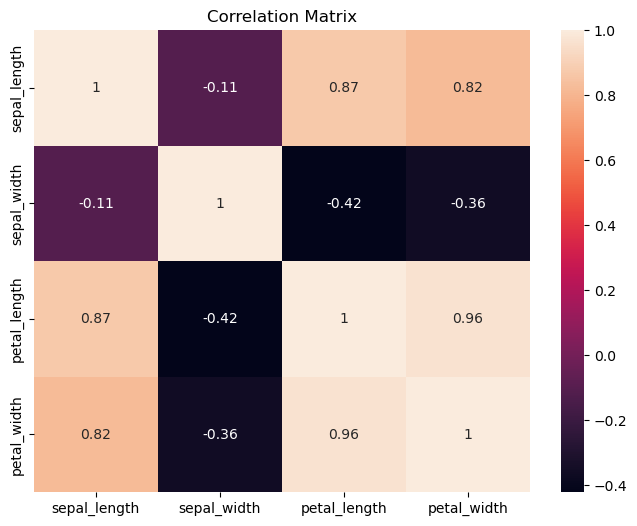

In [6]:
# Selecting all columns except the last one and converting them to float
df.iloc[:, :-1] = df.iloc[:, :-1].astype(float)

# Plotting the correlation matrix without warning
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.title('Correlation Matrix')
plt.savefig('images/Correlation Matrix.png')
plt.show()

On the current dataset, a strong relationship  is observable between petal length and petal width, meaning that both variable increases  proportionally. Less strong but also relevant is the relationship  between petal_length and sepal length. One good way of visualising  how different  features impact on the flower class is to create  a scatter plot, see next section.

<u> Graphical Visualization </u>

In part one 2 types of variables were described:
<li> Numerical </li> 
<li> Categorical</li>

Different types of graphs are applied to each type of variable. Below each individual  variable  is described as possible data representation/visualization.

Numerical variable:
1) histograms
2) scatter plots
3) box plot
4) Violin Plots
5) Line Chart


Categorical variable
1) Pie Chart
2) Bar Chart

Regarding the numerical variables, seaborn library is used to have a general idea about the dataset dispersion. 

The seaborn output corresponds  to a matrix of plots that is composed by:
<li> Scatter plots : characterize the relations between the quantitive variables </li> 
<li> Histogram plot: distribution of one single quantitative  variable </li>

The pairplot graph resulted from the seaborn library can be splitted in 4 different rows. Each row describes the relation of one single dataset variable (Y axis) across  all the other dataset variables which are represented on each one of the 4 columns (X axis). 

Once there is no information about ploting the variable against itself once would result a non-relevant linear distribution, the set of graphs that are on the diagonal are replaced by a histogram representation. This histogram gives an idea how the variable behaves along all the 3 different flower species.  Moreover, if a imaginary line is placed across the histograms, cutting the shown output in two halfs, only on side is  relevant. The other side can be ignored once correspond to the repetition of the other half's but with the X and Y axis swapped. 

See piece of code above:


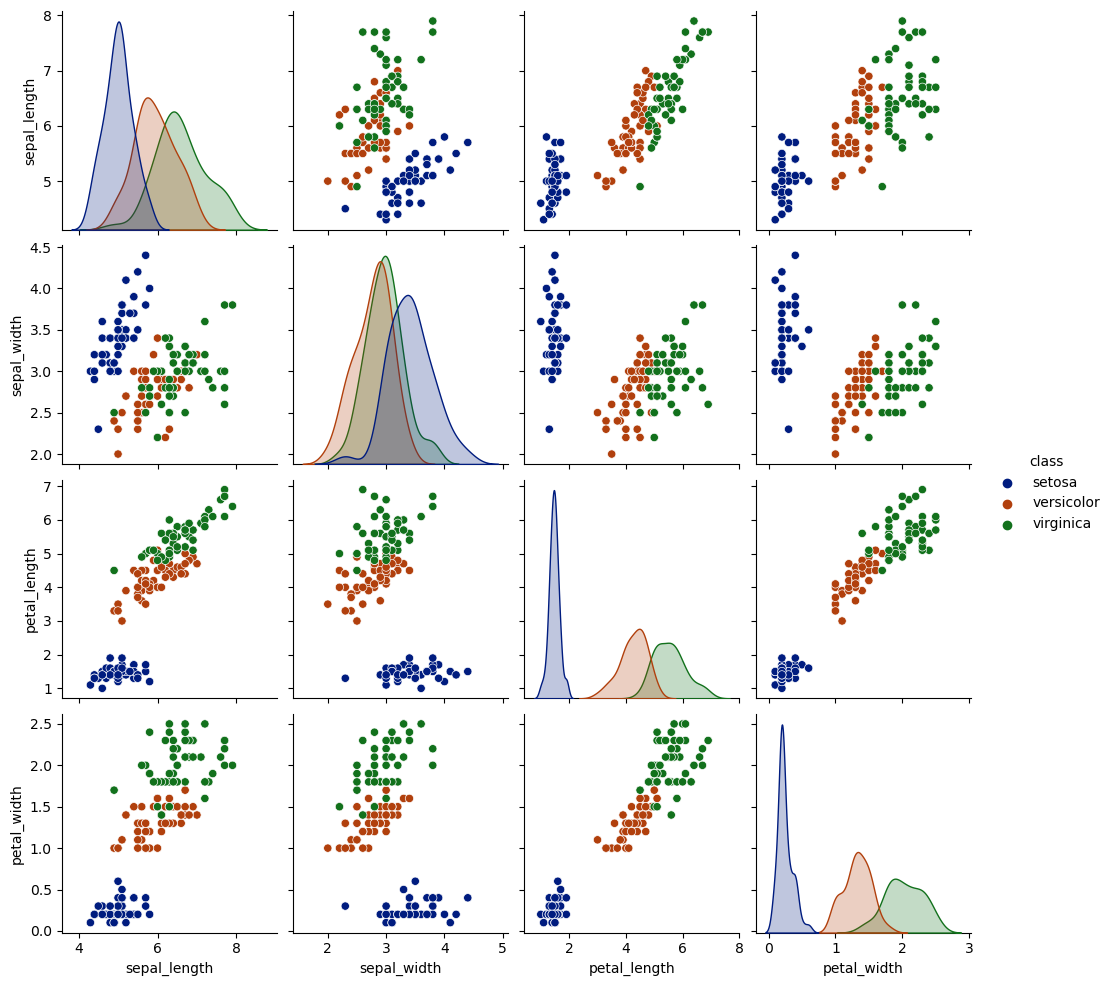

In [7]:
# Create pairplot using seaborn library
#sns.pairplot(df, hue='class', palette='dark', diag_kind ='hist')

# better vizualization with the probability density function,as per the following
sns.pairplot(df, hue='class', palette='dark')

plt.savefig('images/Pair Plot.png')
plt.show()

Previous pairplot already show interesting facts about the data:
    1) Setosa class is easily distinguishable from the remaining classes if taken the petal descriptors as decisive factor, either the petal width or petal length. For example dataset indicates that petal_width < 0.75 mm or petal_length <2 is always a flower from setosa class. Not as accurate as the previous descriptors, septal length can also be considered as a relevant parameter for distinguish between setosa and the remain classes. However some misclassifications are expected from here once there is some overlap on the probability density functions-  row 2 - for the characterized classes. 

<u> Box Plot </u>

The box plot diagram is other option for representing the numerical variables.  A box plot shows important information about variable in a easy way to analyse . It helps to understand where the middle of the numbers is (the median), how much the numbers are spread out from the middle (variability), and if there are any unusual numbers that are very different from the others (outliers).All these mentioned information is represented on the same plot which per se provides a valuable summary of the distribution through five key summary statistics: minimum, first quartile (Q1), median (second quartile, Q2), third quartile (Q3), and maximum values.

The box plot is also a good graphical way of comparing how are the variables/descriptors spread in different classes. It is expected from the previous analysis that petal width and petal length present a distinctive distribution for the setosa class. 

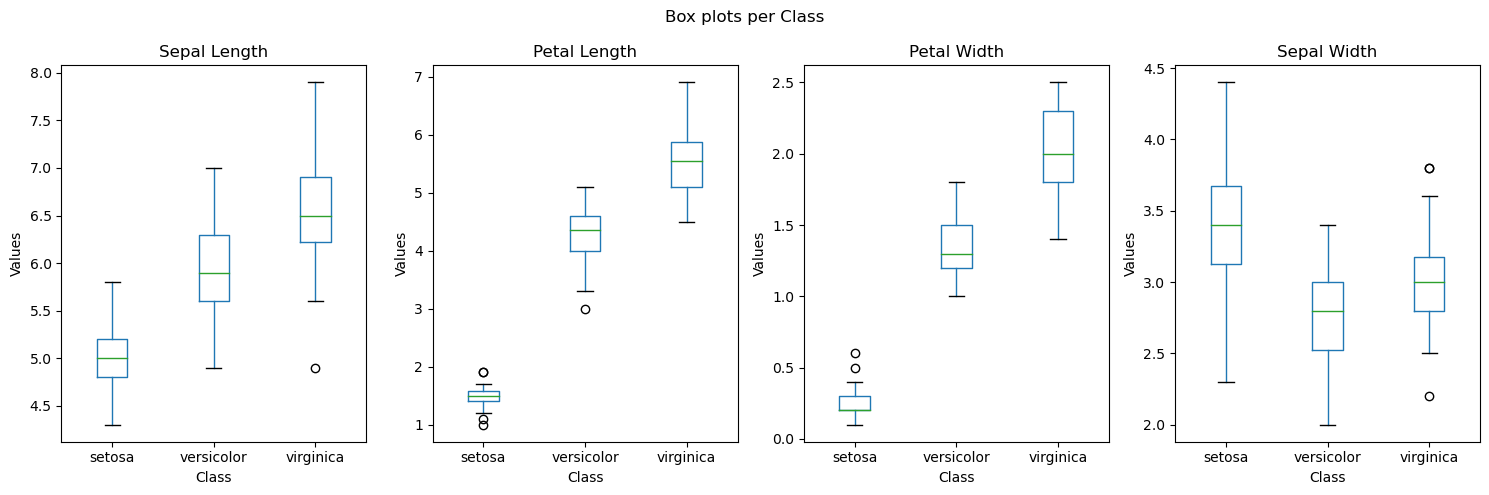

In [8]:

# Creating side-by-side box plots for each variable categorized by 'class' 
fig, axs = plt.subplots(1, 4, figsize=(15, 5))


variables = ['sepal_length', 'petal_length', 'petal_width', 'sepal_width']
titles = ['Sepal Length', 'Petal Length', 'Petal Width', 'Sepal Width']

for i, var in enumerate(variables):
    df.boxplot(column=var, by='class', grid=False, ax=axs[i])
    axs[i].set_title(titles[i])
    axs[i].set_xlabel('Class')
    axs[i].set_ylabel('Values')

plt.suptitle('Box plots per Class')
plt.tight_layout()

plt.savefig('images/Box Plot.png')
plt.show()


<u> Violin Plot </u>
These violin plots offer a visual means to comprehend and compare the distributions of various variables among different species in the dataset, facilitating insights into potential relationships or distinctions among them.

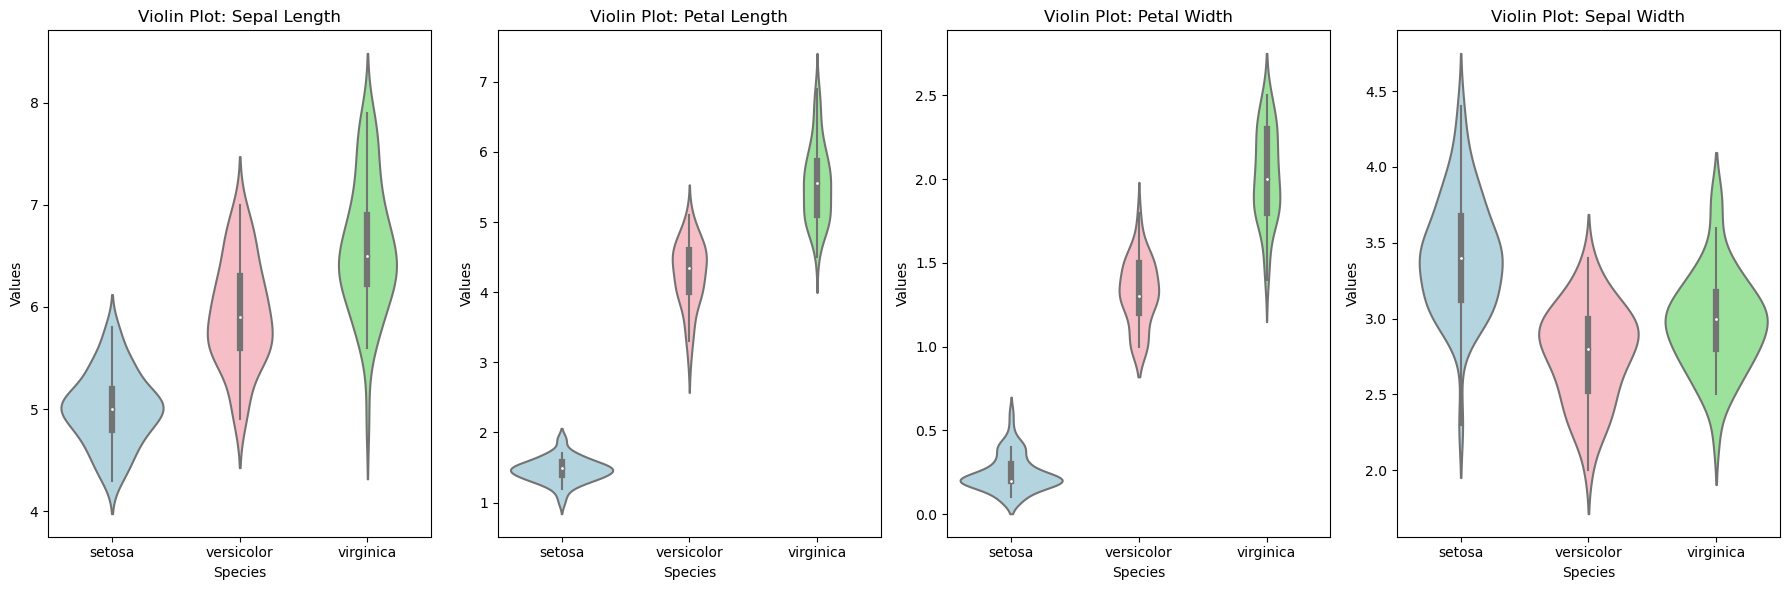

In [9]:
fig2, axs = plt.subplots(1, 4, figsize=(18, 6))


for i, var in enumerate(variables):
    sns.violinplot(x='class', y=var, data=df, ax=axs[i], palette=["lightblue", "lightpink", "lightgreen"])
    axs[i].set_title(f'Violin Plot: {titles[i]}')
    axs[i].set_xlabel('Species')
    axs[i].set_ylabel('Values')

plt.tight_layout()
plt.savefig('images/Violin Plot.png')
plt.show()


<u> Line Chart </u>

This type of graph is useful for analysing tendencies over the dataset. The analysis is performed across a continuous scale which could be time or the acquisition sequence for example. For example on the iris data set an example would be to evaluate the changes of a sepal length  over the 50 samples across  each individual specie. 

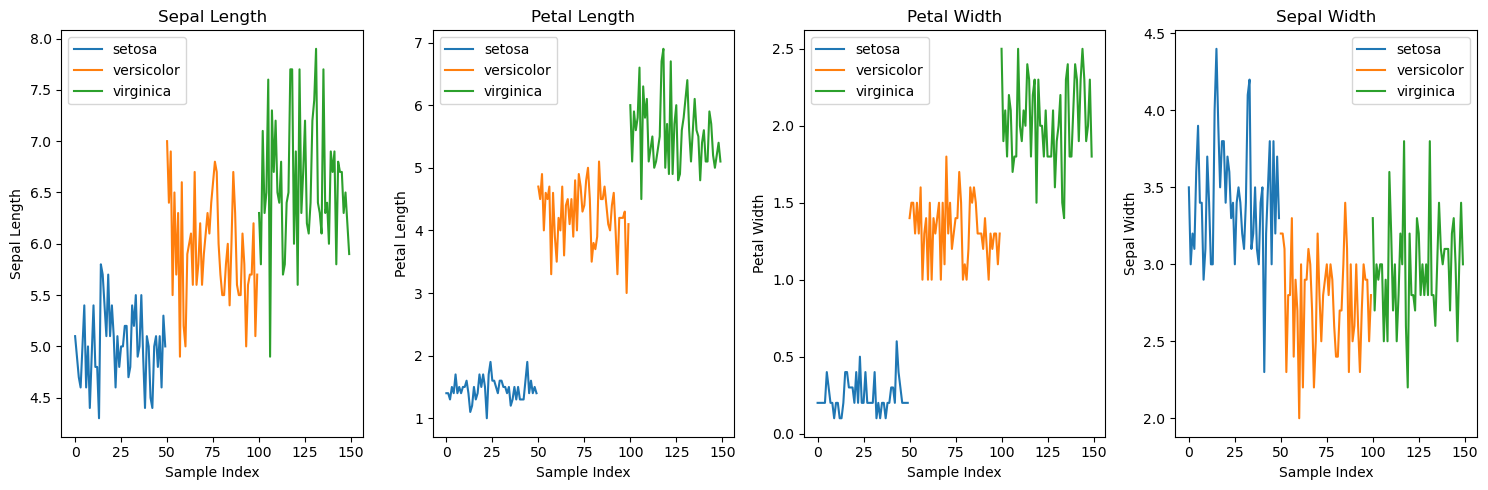

In [10]:


fig, axs = plt.subplots(1, 4, figsize=(15, 5))

variables = ['sepal_length', 'petal_length', 'petal_width', 'sepal_width']
titles = ['Sepal Length', 'Petal Length', 'Petal Width', 'Sepal Width']
classes = ['setosa', 'versicolor', 'virginica']

for i, var in enumerate(variables):
    for cls in classes:
        axs[i].plot(df[df['class'] == cls][var], label=cls)

    axs[i].set_title(titles[i])
    axs[i].set_xlabel('Sample Index')
    axs[i].set_ylabel(titles[i])
    axs[i].legend()

plt.savefig('images/Line Chart.png')
plt.tight_layout()
plt.show()


No dependencies have been identified among the individual descriptors across various classes. The specific dataset's Sample Index is not known, but it could potentially be interpreted as the registration sequence.


## __Qualitative variables__


<u> Pie Char </u>
For the categorical variables, is interesting to analyse if the dataset is equally distributed across  all the classes. A simple way to analyse this is to create a pie plot which indicates how much of each individual class is represented on all dataset. 

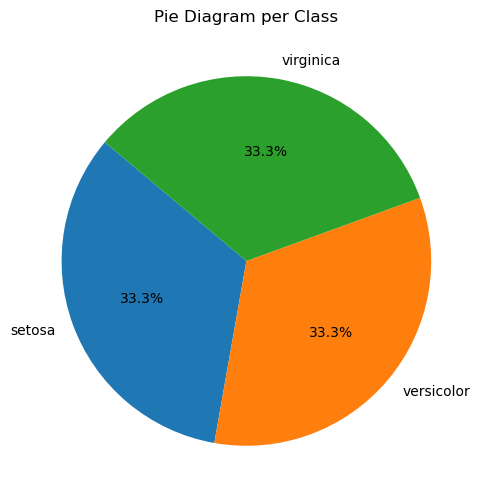

In [11]:
# count the number of classes
class_counts = df['class'].value_counts()

# Create a pie chart for class distribution
plt.figure(figsize=(8, 6))

plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Pie Diagram per Class')
plt.savefig('images/Pie Chart.png')
plt.show()


<u> Bar Char </u>

Other way of visualizing  the categorical data is through the usage of a bar char which shows are the different classes represented. 


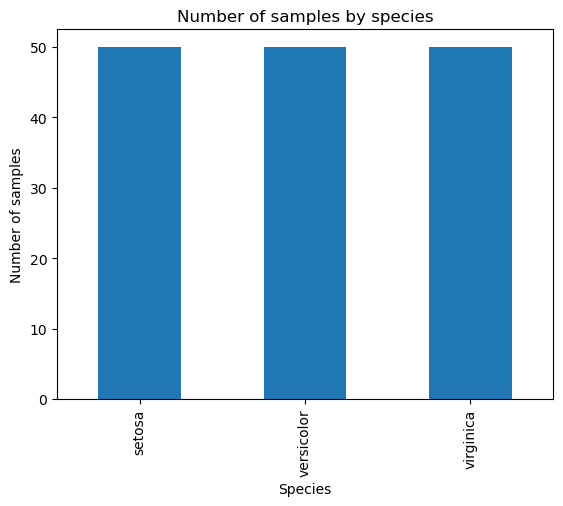

In [12]:
df['class'].value_counts().plot(kind='bar')

plt.xlabel('Species')
plt.ylabel ('Number of samples')
plt.title ('Number of samples by species')
plt.savefig('images/Class Distributions.png')
plt.show()



***